# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key_weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [70]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

631

In [211]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city="London"
units="imperial"
query_url = f"{url}appid={api_key_weather}&units={units}&q="
response=requests.get(query_url + city)
weather_data=response.json()
print(weather_data)
print(weather_data['name'])
print(weather_data['clouds']['all'])
print(weather_data['sys']['country'])
print(weather_data['dt'])
print(weather_data['main']['humidity'])
print(weather_data['coord']['lon'])
print(weather_data['coord']['lat'])
print(weather_data['main']['temp_max'])
print(weather_data['wind']['speed'])

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.27, 'feels_like': 54.77, 'temp_min': 53.2, 'temp_max': 56.55, 'pressure': 1013, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 200}, 'clouds': {'all': 75}, 'dt': 1641083335, 'sys': {'type': 2, 'id': 2019646, 'country': 'GB', 'sunrise': 1641110761, 'sunset': 1641139355}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}
London
75
GB
1641083335
91
-0.1257
51.5085
56.55
11.5


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [285]:
weatherdata=[]
url = "http://api.openweathermap.org/data/2.5/weather?"
#city="Tasiilaq"
units="imperial"
query_url = f"{url}appid={api_key_weather}&units={units}&q="
item=1
batch=1
print(f"Beginning Data Retrieval")     
print(f"-------------------------")
for city in cities:
    response=requests.get(query_url + city)
    weather_data=response.json()
    n=n+1

    try:
        print(f"Processing Record {item} of Set {batch} | {city}")  
        City=weather_data['name']
        Lat=weather_data['coord']['lat']
        Lng=weather_data['coord']['lon']
        Maxtemp=weather_data['main']['temp_max']
        Humidity=weather_data['main']['humidity']
        Cloudiness=weather_data['clouds']['all']
        WindSpeed=weather_data['wind']['speed']
        Country=weather_data['sys']['country']
        Date=weather_data['dt']     
        weatherdata.append([City,Lat,Lng,Maxtemp,Humidity,Cloudiness,WindSpeed,Country,Date])
        
        # icreate item count by 1
        item +=1
        if item>50:
            #start a new set of items
            batch +=1
            
            # reset item count to 1
            item=1
            time.sleep(.5)
    except:
        print(f"City '{city}' not found.Skipping...")

# --- print completion header after displaying for loop  data ---
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")
    
              

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | ozu
Processing Record 2 of Set 1 | laguna
Processing Record 3 of Set 1 | bealanana
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | ouadda
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | lodhran
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | lae
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | constitucion
Processing Record 12 of Set 1 | skibbereen
Processing Record 13 of Set 1 | samusu
City 'samusu' not found.Skipping...
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | norden
Processing Record 17 of Set 1 | vestmannaeyjar
Processing Record 18 of Set 1 | tabuk
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | vaitupu
City 'vaitupu' not found.Skipping...
Processing Record 20 of Se

Processing Record 12 of Set 4 | veinticinco de mayo
Processing Record 13 of Set 4 | sangmelima
Processing Record 14 of Set 4 | muros
Processing Record 15 of Set 4 | kenitra
Processing Record 16 of Set 4 | sao filipe
Processing Record 17 of Set 4 | kapaa
Processing Record 18 of Set 4 | yuli
Processing Record 19 of Set 4 | meyungs
City 'meyungs' not found.Skipping...
Processing Record 19 of Set 4 | padang
Processing Record 20 of Set 4 | port keats
Processing Record 21 of Set 4 | east london
Processing Record 22 of Set 4 | tromso
Processing Record 23 of Set 4 | abu samrah
Processing Record 24 of Set 4 | kodiak
Processing Record 25 of Set 4 | temaraia
City 'temaraia' not found.Skipping...
Processing Record 25 of Set 4 | mildura
Processing Record 26 of Set 4 | breisach
Processing Record 27 of Set 4 | yarmouth
Processing Record 28 of Set 4 | hithadhoo
Processing Record 29 of Set 4 | tura
Processing Record 30 of Set 4 | vitim
Processing Record 31 of Set 4 | the valley
Processing Record 32 of 

Processing Record 25 of Set 7 | bako
Processing Record 26 of Set 7 | havoysund
Processing Record 27 of Set 7 | manavgat
Processing Record 28 of Set 7 | thaton
Processing Record 29 of Set 7 | zhigansk
Processing Record 30 of Set 7 | quelimane
Processing Record 31 of Set 7 | whyalla
Processing Record 32 of Set 7 | esfahan
Processing Record 33 of Set 7 | vila velha
Processing Record 34 of Set 7 | pervomayskoye
Processing Record 35 of Set 7 | lazarev
Processing Record 36 of Set 7 | severnoye
Processing Record 37 of Set 7 | batticaloa
Processing Record 38 of Set 7 | mandalgovi
Processing Record 39 of Set 7 | lolua
City 'lolua' not found.Skipping...
Processing Record 39 of Set 7 | belyy yar
Processing Record 40 of Set 7 | harper
Processing Record 41 of Set 7 | mersing
Processing Record 42 of Set 7 | staraya kulatka
Processing Record 43 of Set 7 | praya
Processing Record 44 of Set 7 | mys shmidta
City 'mys shmidta' not found.Skipping...
Processing Record 44 of Set 7 | puerto carreno
Processin

Processing Record 1 of Set 11 | plaisance-du-touch
Processing Record 2 of Set 11 | la plata
Processing Record 3 of Set 11 | igrim
Processing Record 4 of Set 11 | hobyo
Processing Record 5 of Set 11 | diffa
Processing Record 6 of Set 11 | aksu
Processing Record 7 of Set 11 | marawi
Processing Record 8 of Set 11 | ankara
Processing Record 9 of Set 11 | ranong
Processing Record 10 of Set 11 | puruaran
Processing Record 11 of Set 11 | venado tuerto
Processing Record 12 of Set 11 | loei
Processing Record 13 of Set 11 | ulaangom
Processing Record 14 of Set 11 | qazvin
Processing Record 15 of Set 11 | sioux lookout
Processing Record 16 of Set 11 | taltal
Processing Record 17 of Set 11 | husavik
Processing Record 18 of Set 11 | rio grande
Processing Record 19 of Set 11 | sooke
Processing Record 20 of Set 11 | nokaneng
Processing Record 21 of Set 11 | limoux
Processing Record 22 of Set 11 | tiznit
Processing Record 23 of Set 11 | katobu
Processing Record 24 of Set 11 | bani
Processing Record 25

In [288]:
weatherdata

[['Ōzu', 33.5, 132.55, 44.19, 61, 63, 4.68, 'JP', 1641168893],
 ['Laguna', 38.421, -121.4238, 55.24, 68, 1, 1.01, 'US', 1641168893],
 ['Bealanana', -14.55, 48.7333, 65.17, 96, 98, 0.4, 'MG', 1641168893],
 ['Bredasdorp', -34.5322, 20.0403, 58.32, 82, 88, 3.44, 'ZA', 1641168893],
 ['Ouadda', 8.0777, 22.4007, 70.97, 28, 47, 7.23, 'CF', 1641168893],
 ['Hobart', -42.8794, 147.3294, 64.02, 68, 75, 1.01, 'AU', 1641168893],
 ['Lodhran', 29.5405, 71.6336, 57.16, 26, 97, 4.97, 'PK', 1641168893],
 ['Jamestown', 42.097, -79.2353, 26.1, 70, 90, 5.99, 'US', 1641168893],
 ['Lae', -6.7221, 146.9847, 84.87, 67, 100, 4.72, 'PG', 1641168893],
 ['Cidreira', -30.1811, -50.2056, 73.49, 95, 100, 10.04, 'BR', 1641168894],
 ['Constitución', -35.3333, -72.4167, 61.59, 92, 12, 7.25, 'CL', 1641168894],
 ['Skibbereen', 51.55, -9.2667, 48, 80, 30, 27.22, 'IE', 1641168894],
 ['New Norfolk', -42.7826, 147.0587, 63.66, 62, 99, 1.01, 'AU', 1641168894],
 ['Mataura', -46.1927, 168.8643, 69.48, 43, 100, 0.76, 'NZ', 164116

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [289]:
#converting to data frame
weatherdata_df=pd.DataFrame(weatherdata,columns=["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"])
#displaying the data frame
weatherdata_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ōzu,33.5000,132.5500,44.19,61,63,4.68,JP,1641168893
1,Laguna,38.4210,-121.4238,55.24,68,1,1.01,US,1641168893
2,Bealanana,-14.5500,48.7333,65.17,96,98,0.40,MG,1641168893
3,Bredasdorp,-34.5322,20.0403,58.32,82,88,3.44,ZA,1641168893
4,Ouadda,8.0777,22.4007,70.97,28,47,7.23,CF,1641168893


In [290]:
#writing to CSV file
weatherdata_df.to_csv("../Output_data/CityWeather.csv", index=True,index_label="City ID", header=True)
weatherdata_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ōzu,33.5000,132.5500,44.19,61,63,4.68,JP,1641168893
1,Laguna,38.4210,-121.4238,55.24,68,1,1.01,US,1641168893
2,Bealanana,-14.5500,48.7333,65.17,96,98,0.40,MG,1641168893
3,Bredasdorp,-34.5322,20.0403,58.32,82,88,3.44,ZA,1641168893
4,Ouadda,8.0777,22.4007,70.97,28,47,7.23,CF,1641168893
...,...,...,...,...,...,...,...,...,...
571,Stornoway,58.2093,-6.3865,42.93,92,75,5.75,GB,1641168998
572,Viedma,-40.8135,-62.9967,63.72,40,69,4.83,AR,1641168973
573,Antofagasta,-23.6500,-70.4000,66.42,82,4,6.60,CL,1641168751
574,Nemuro,43.3236,145.5750,19.83,63,24,24.90,JP,1641168999


In [291]:
weatherdata_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,20.329796,11.624655,49.137847,75.194444,60.793403,8.223958,1.641169e+09
std,32.964649,89.664850,31.454992,18.961390,37.470647,6.512334,6.289587e+01
min,-54.800000,-179.166700,-51.720000,11.000000,0.000000,0.000000,1.641169e+09
25%,-5.804200,-68.227925,27.550000,66.000000,21.750000,3.537500,1.641169e+09
50%,23.180100,14.657200,59.090000,78.000000,75.000000,6.610000,1.641169e+09
75%,47.114775,88.852925,75.110000,89.000000,98.000000,11.360000,1.641169e+09
max,78.218600,179.316700,96.640000,100.000000,100.000000,39.120000,1.641169e+09


In [292]:
##finding data of citiies having humditiy over 100
weatherdata_df_updated=weatherdata_df[weatherdata_df.Humidity>100]
#showing the updated datafrome with no values. Hence no city with humidity over 100%
weatherdata_df_updated.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [243]:
weatherdata_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

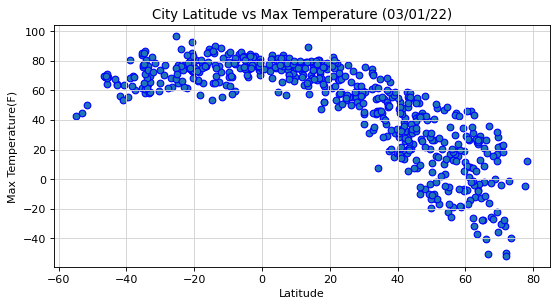

In [293]:
Date = time.strftime("%d/%m/%y")
plt.figure
fig=plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(weatherdata_df["Lat"],weatherdata_df["Max Temp"], marker="o",edgecolor="blue")
plt.title(f"City Latitude vs Max Temperature ({Date})")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/CityLatitudeVsMaxTemp.png")

## Latitude vs. Humidity Plot

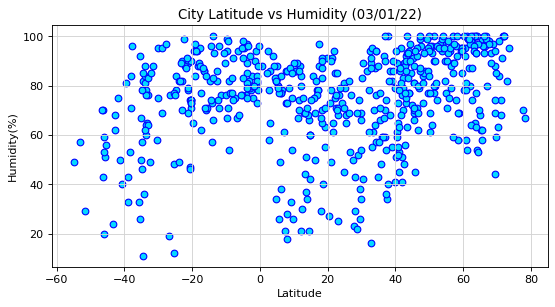

In [294]:
plt.figure
fig=plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(weatherdata_df["Lat"],weatherdata_df["Humidity"],c="#04d9ff", edgecolor="blue")
plt.title(f"City Latitude vs Humidity ({Date})")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/CityLatitudeVsHumidity.png")

In [ ]:
The graph doesnt show a clear relationship between latitude and humidity however, mostly countries around the globe tend to
have a higher humidity level. 

## Latitude vs. Cloudiness Plot

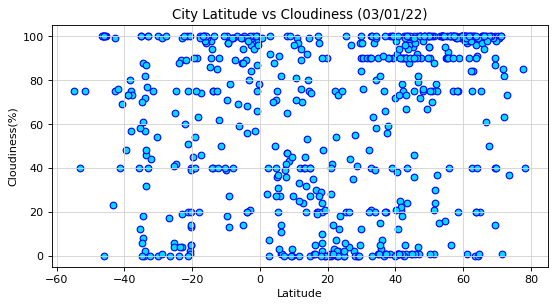

In [295]:
plt.figure
fig=plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(weatherdata_df["Lat"],weatherdata_df["Cloudiness"],c="#04d9ff", edgecolor="blue")
plt.title(f"City Latitude vs Cloudiness ({Date})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/CityLatitudeVsCloudiness.png")

## Latitude vs. Wind Speed Plot

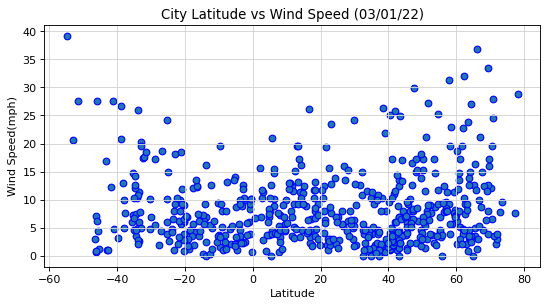

In [296]:
plt.figure
fig=plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(weatherdata_df["Lat"],weatherdata_df["Wind Speed"],edgecolor="blue")
plt.title(f"City Latitude vs Wind Speed ({Date})")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/CityLatitudeVsWindSpeed.png")

In [259]:
print(weatherdata_df_nh.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 553
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        390 non-null    object 
 1   Lat         390 non-null    object 
 2   Lng         390 non-null    float64
 3   Max Temp    390 non-null    float64
 4   Humidity    390 non-null    int64  
 5   Cloudiness  390 non-null    int64  
 6   Wind Speed  390 non-null    float64
 7   Country     390 non-null    object 
 8   Date        390 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 30.5+ KB
None


## Linear Regression

r values is: -0.7632748233785076


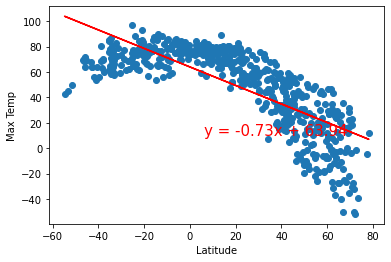

<Figure size 432x288 with 0 Axes>

In [297]:
x_values=weatherdata_df["Lat"].astype('float')
y_values = weatherdata_df["Max Temp"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/CityLatitudeVsMaxTemp_LR.png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r values is: -0.8424704356919201


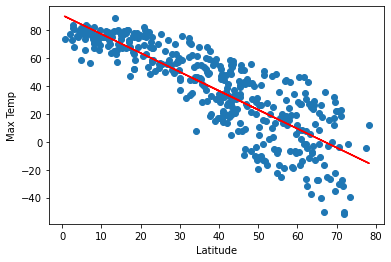

<Figure size 432x288 with 0 Axes>

In [298]:
#converting first lat to str to find the values above 0 for northern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_north_hs=weatherdata_df.loc[weatherdata_df["Lat"]>"0"]

x_values=weatherdata_df_north_hs["Lat"].astype('float')
y_values = weatherdata_df_north_hs["Max Temp"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-60),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/NHLatitudeVsMaxTemp_LR.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r values is: 0.45480313588990545


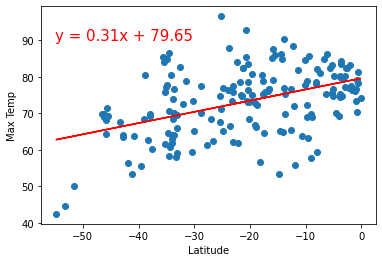

<Figure size 432x288 with 0 Axes>

In [299]:
#converting first lat to str to find the values below 0 for southern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_south_hs=weatherdata_df.loc[weatherdata_df["Lat"]<"0"]

x_values=weatherdata_df_south_hs["Lat"].astype('float')
y_values = weatherdata_df_south_hs["Max Temp"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq1,(-55,90),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/SHLatitudeVsMaxTemp_LR.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r values is: 0.3610711356932242


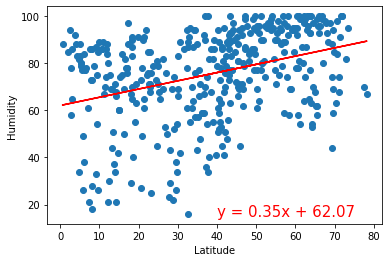

<Figure size 432x288 with 0 Axes>

In [300]:
#converting first lat to str to find the values above 0 for northern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_north_hs=weatherdata_df.loc[weatherdata_df["Lat"]>"0"]

x_values=weatherdata_df_north_hs["Lat"].astype('float')
y_values = weatherdata_df_north_hs["Humidity"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/HumidityVsNHLatitude_LR.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r values is: 0.5152357922159259


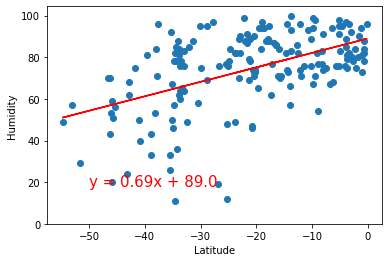

<Figure size 432x288 with 0 Axes>

In [301]:
#converting first lat to str to find the values below 0 for southern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_south_hs=weatherdata_df.loc[weatherdata_df["Lat"]<"0"]

x_values=weatherdata_df_south_hs["Lat"].astype('float')
y_values = weatherdata_df_south_hs["Humidity"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,18),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.yticks(np.arange(0,120, 20))

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/HumidityVsSHLatitude_LR.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r values is: 0.3978060938339302


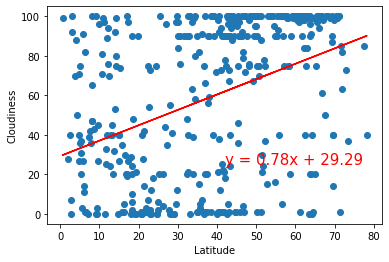

<Figure size 432x288 with 0 Axes>

In [302]:
#converting first lat to str to find the values above 0 for northern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_north_hs=weatherdata_df.loc[weatherdata_df["Lat"]>"0"]

x_values=weatherdata_df_north_hs["Lat"].astype('float')
y_values = weatherdata_df_north_hs["Cloudiness"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/CloudinessVsNHLatitude_LR.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r values is: 0.17897224359194164


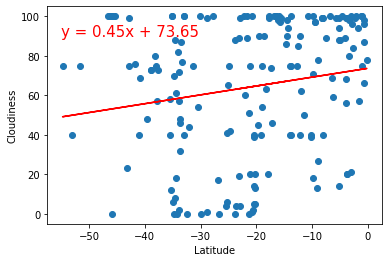

<Figure size 432x288 with 0 Axes>

In [303]:
#converting first lat to str to find the values below 0 for southern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_south_hs=weatherdata_df.loc[weatherdata_df["Lat"]<"0"]

x_values=weatherdata_df_south_hs["Lat"].astype('float')
y_values = weatherdata_df_south_hs["Cloudiness"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.yticks(np.arange(0,120, 20))

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/CloudinessVsSHLatitude_LR.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r values is: 0.14518862440267877


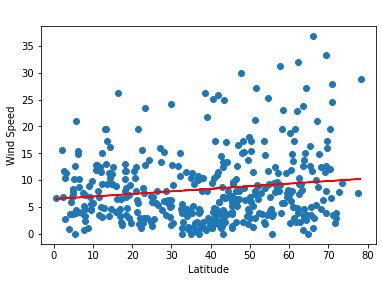

<Figure size 432x288 with 0 Axes>

In [304]:
#converting first lat to str to find the values above 0 for northern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_north_hs=weatherdata_df.loc[weatherdata_df["Lat"]>"0"]

x_values=weatherdata_df_north_hs["Lat"].astype('float')
y_values = weatherdata_df_north_hs["Wind Speed"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/WindSpeedVsNHLatitude_LR.png")

In [ ]:
The pattern above shows that wind speed for most of the countries in northern hemisphere is in the range of 0-10 mph however,
there are some countries with latitude between 60~70 where the wind speed goes above 40 mph

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r values is: -0.3293060737417026


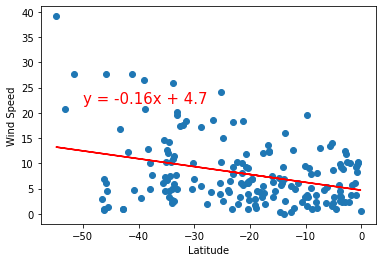

<Figure size 432x288 with 0 Axes>

In [305]:
#converting first lat to str to find the values below 0 for southern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_south_hs=weatherdata_df.loc[weatherdata_df["Lat"]<"0"]

x_values=weatherdata_df_south_hs["Lat"].astype('float')
y_values = weatherdata_df_south_hs["Wind Speed"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#plt.yticks(np.arange(0,120, 20))

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/WindSpeedVsSHLatitude_LR.png")